<a href="https://colab.research.google.com/github/Ryeongeun-Kim/2024/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA 불러오기 및 사전 작업**

In [1]:
import numpy as np
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%cd /content/drive/MyDrive/AI lab/
!pwd

/content/drive/MyDrive/AI lab
/content/drive/MyDrive/AI lab


In [3]:
def unpickle(file):
  import pickle
  with open(file, 'rb') as fo:
    dict = pickle.load(fo, encoding='bytes')
  return dict

In [4]:
bat1 = unpickle('data_batch_1')
bat2 = unpickle('data_batch_2')
bat3 = unpickle('data_batch_3')
bat4 = unpickle('data_batch_4')
bat5 = unpickle('data_batch_5')
bat_test = unpickle('test_batch')

In [5]:
data = np.concatenate([bat1[b'data'], bat2[b'data'], bat3[b'data'],bat4[b'data'],
bat5[b'data']])
labels = np.concatenate([bat1[b'labels'], bat2[b'labels'], bat3[b'labels'],bat4[b'labels'],
bat5[b'labels']])

In [6]:
np.shape(data)

(50000, 3072)

In [7]:
np.shape(labels)

(50000,)

## **1번. k를 입력받는 KNN**

In [8]:
import numpy as np

class NearestNeighbor:

    def __init__(self):
        pass

    def train(self, X, y):
        self.Xtr = X
        self.ytr = y

    def predict(self, X, k=1):
        num_test = X.shape[0]
        Ypred = np.zeros(num_test, dtype=self.ytr.dtype)

        for i in range(num_test):
            distances = np.sum(np.abs(self.Xtr - X[i,:]), axis=1)
            min_indices = np.argsort(distances)[:k]
            closest_labels = self.ytr[min_indices]
            Ypred[i] = np.argmax(np.bincount(closest_labels))
        return Ypred

In [9]:
train_data = data
train_label = labels
test_data = bat_test[b'data']
test_label = bat_test[b'labels']
test_size = 10
type(data[0,0])

numpy.uint8

# **k를 입력받아서 accuracy 구해보기**

In [17]:
NN_classifier = NearestNeighbor()
NN_classifier.train(train_data,train_label)
test_in = test_data[0:test_size]
pred = NN_classifier.predict(test_in, k=9)

In [18]:
num_correct = np.sum(pred == test_label[0:test_size])
accuracy = float(num_correct) / test_size
print(pred)
print(test_label[0:test_size])
print("The accuracy is (%):", accuracy*100)

[0 1 8 0 0 2 4 2 0 1]
[3, 8, 8, 0, 6, 6, 1, 6, 3, 1]
The accuracy is (%): 30.0


# **2번. accuracy구하고 그래프로 나타내기**

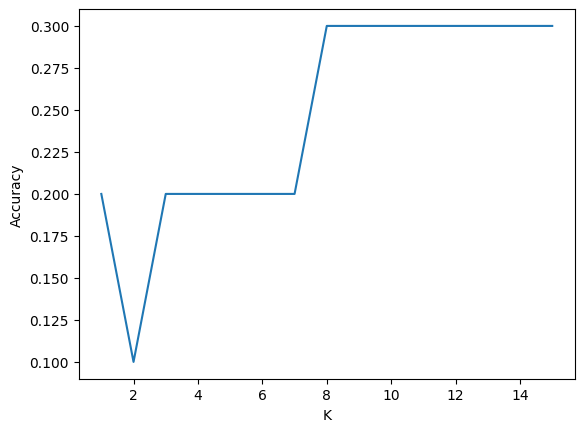

In [13]:
import numpy as np
import matplotlib.pyplot as plt
accuracy_scores = []
k_values = range(1, 16)
for k in k_values:
    NN_classifier = NearestNeighbor()
    NN_classifier.train(train_data, train_label)
    Ypred = NN_classifier.predict(test_in[0:test_size], k)
    num_correct = np.sum(Ypred == test_label[0:test_size])
    accuracy = float(num_correct) / test_size
    accuracy_scores.append(accuracy)

plt.plot(k_values, accuracy_scores)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

3번

# **3번. Euclidean 방법으로 거리 구하고 그래프로 나타내기**

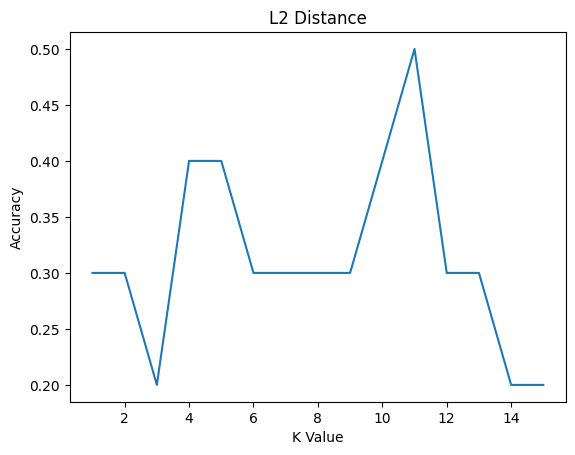

In [16]:
import numpy as np

class NearestNeighborL2:

    def __init__(self):
        pass

    def train(self, X, y):
        self.Xtr = X
        self.ytr = y

    def predict(self, X, k=1):
        num_test = X.shape[0]
        Ypred = np.zeros(num_test, dtype=self.ytr.dtype)

        for i in range(num_test):
            distances = np.sqrt(np.sum(np.square(self.Xtr - X[i,:]), axis=1))
            min_indices = np.argsort(distances)[:k]
            closest_labels = self.ytr[min_indices]
            Ypred[i] = np.argmax(np.bincount(closest_labels))
        return Ypred

def calculate_accuracy(k_values, train_data, train_label, test_data, test_label, test_size):
    accuracies = []
    for k in k_values:
        NN_classifier = NearestNeighborL2()
        NN_classifier.train(train_data, train_label)
        test_in = test_data[:test_size]
        pred = NN_classifier.predict(test_in, k)
        num_correct = np.sum(pred == test_label[:test_size])
        accuracy = float(num_correct) / test_size
        accuracies.append(accuracy)
    return accuracies
k_values = range(1, 16)
accuracies = calculate_accuracy(k_values, train_data, train_label, test_data, test_label, test_size)
import matplotlib.pyplot as plt

plt.plot(k_values, accuracies)
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('L2 Distance')
plt.show()

# **2번과 3번 비교하는 그래프 생성**

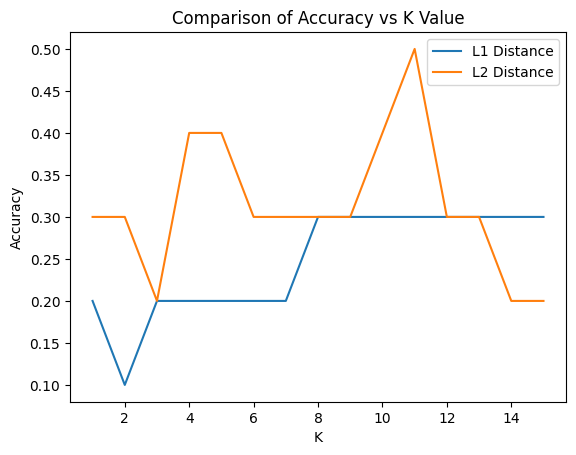

In [15]:
import numpy as np
import matplotlib.pyplot as plt

class NearestNeighborL2:

    def __init__(self):
        pass

    def train(self, X, y):
        self.Xtr = X
        self.ytr = y

    def predict(self, X, k=1):
        num_test = X.shape[0]
        Ypred = np.zeros(num_test, dtype=self.ytr.dtype)

        for i in range(num_test):
            distances = np.sqrt(np.sum(np.square(self.Xtr - X[i,:]), axis=1))
            min_indices = np.argsort(distances)[:k]
            closest_labels = self.ytr[min_indices]
            Ypred[i] = np.argmax(np.bincount(closest_labels))
        return Ypred
accuracy_scores = []
accuracy_scores_l2 = []
k_values = range(1, 16)
for k in k_values:
    NN_classifier = NearestNeighbor()
    NN_classifier.train(train_data, train_label)
    Ypred = NN_classifier.predict(test_data[0:test_size], k)
    num_correct = np.sum(Ypred == test_label[0:test_size])
    accuracy = float(num_correct) / test_size
    accuracy_scores.append(accuracy)

    NN_classifier_l2 = NearestNeighborL2()
    NN_classifier_l2.train(train_data, train_label)
    Ypred_l2 = NN_classifier_l2.predict(test_data[0:test_size], k)
    num_correct_l2 = np.sum(Ypred_l2 == test_label[0:test_size])
    accuracy_l2 = float(num_correct_l2) / test_size
    accuracy_scores_l2.append(accuracy_l2)

plt.plot(k_values, accuracy_scores, label='L1 Distance')
plt.plot(k_values, accuracy_scores_l2, label='L2 Distance')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Comparison of Accuracy vs K Value")
plt.legend()
plt.show()